<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/Logistic_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [26]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [27]:
!pip install xlrd
!pip install openpyxl

In [28]:
with open("breast-cancer-wisconsin.names") as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

## Yixin's Data Formating 
    It will all collapse in a single place

In [48]:
col_name = ['Samplecodenumber','ClumpThickness','UniformityofCellSize','UniformityofCellShape',
            'MarginalAdhesion','SingleEpithelialCellSize','BareNuclei',
            'BlandChromatin','NormalNucleoli','Mitoses','Class']
cancerdata = pd.read_csv('/content/tumor.csv', low_memory=False,names=col_name)
cancerdata.head()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2


In [49]:
#Drop the column that represent ID
cancerdata = cancerdata.drop(['Samplecodenumber'], 1)
# Check the loan status and distinct the target value.
cancerdata['Class'].value_counts()
#Select the finished loan including repaid and late, delete the 'current' loan

2        444
4        239
Class      1
Name: Class, dtype: int64

In [50]:
#Select the finished loan including repaid and late, delete the 'current' loan
Benign = cancerdata[(cancerdata.Class == 2) ].sample(240).index
Malignant = cancerdata[(cancerdata.Class == 4) ].sample(240).index
cancer = cancerdata.loc[Benign|Malignant]
cancer = cancer.reset_index(drop=True)
cancer['classes'] = cancer.Class.map({2:0,4:1})
cancer = cancer.drop(['Class'], 1)
cancer.head(10)

ValueError: ignored

In [2]:
df = pd.read_csv('/content/tumor.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


# Creating a classifier

## Getting X & Y


In [59]:
#TODO 
# have to randomize the data first
# After that have to divide in X and Y 

## Target Values 
X = df.drop(columns=['Class'])
X = np.array(X)
print(X.shape)

## Label Values
Y = df['Class']
Y = np.array(Y)
print(Y.shape)

# for i in range(0,len(Y)):
#     if Y[i] == 4:
#         Y[i] = 1
#     else:
#         Y[i]=0
# # Storing the number of rows and columns in X
# rows , cols = X.shape
## Making 2 and 4 to 0 and 1 to get result according to sigmoid function

Y = list(map(lambda x : 0 if x==2 else 1, Y))
Y = np.array(Y)

# X_train = X[0:513]
# X_test = X[513:]
# Y_train = Y[0:513]
# Y_test = Y[513:]
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

#This normalization doesnot work 

#X=(X-X.mean())/X.std()

X=(X-X.min())/(X.max()-X.min())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=15)


# Using the inbuilt one gives 100% accuracy because it is dumbdata 
# #Standardizing the data.
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape


(683, 10)
(683,)


## Intialize the weights

In [5]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    # Here dimenstion refer to the number of the attributes in the data
    w = np.zeros(shape=len(dim))
    b = 0
    return w,b

In [6]:
## Just to check wether the function is working fine
dim=X_train[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',b)
print('w',np.sum(w))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0
w 0.0


## Grader Function - Weights
    Check whether things are working fine or not

In [7]:
## Grader Function
## Dont run this cell untill and unless you want to check wether everything is fine or not 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

## Compute Sigmoid

![Sigmoid Function](https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg)

In [8]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+np.exp(-z))

## Compute Log Loss 
![Log Loss](https://miro.medium.com/max/1192/1*wilGXrItaMAJmZNl6RJq9Q.png)

In [9]:
def log_loss(y_labels,y_predicted):
    '''This function will return the log loss of the function'''
    loss = -1 * (np.sum((y_labels * np.log10(y_predicted))+ \
                      ((1-y_labels)*np.log10(1-y_predicted))))/len(y_labels)
    return loss

## Grader Function log_loss

In [10]:
def grader_logloss(true,pred):
    loss=log_loss(true,pred)
    assert(loss==0.07644900402910389)
    return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)


True

## Gradient with respect w (dw)
![Differntiation of cost function wrt to w](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-35e8bb42947bd888580c2a8a9fe8fe0e_l3.svg)

In [11]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    # Calculcating the graindent of weighted vectors
    return x * (y - sigmoid(np.dot(w, x) + b)) - alpha/N*w

In [12]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    assert(np.sum(grad_dw)==2.7259648199999997)
    return True

grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725])

grad_y=0
grad_w,grad_b=initialize_weights(dim)
alpha=0.0001
N=len(X)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

## Compute gradient w.r.t 'b'

In [13]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    # Calculating the gradient of bais
    return y - sigmoid(np.dot(w, x) + b)

In [14]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)
True

True

## Train Function

In [15]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,p):
    ''' In this function, we will implement logistic regression'''
    
    w,b = initialize_weights(X_train[0]) # intilize weight vectors
    same_loss_counter = 0
    N = len(X_train)
    train_loss , test_loss = [],[]
    part_no = 0
    part_size = 25
    ctr = 0
    n = len(X_train)
    
    # Loop to traveres in epoches
    for i in tqdm(range(0,epochs)):
        # Loop to access data point in the 
        for j in range(part_size):
            
            # Calculating gradient of w and adding it to the existing one    
            w = w + eta0*gradient_dw(X_train[(j+part_no)%n], y_train[(j+part_no)%n],w, b, alpha, len(X_train))
            
            #Calculating gradient of b and adding it to the existing one
            b = b + eta0*gradient_db(X_train[(j+part_no)%n], y_train[(j+part_no)%n], w, b)
        

        part_no = (part_no + part_size)%n # To updtae the new part

        #Predicting the traing data in comparison of the the xtrain
        y_pred_train = np.array([sigmoid(np.dot(w, x)+b) for x in X_train])
        
        #Predicting the test data in comaprison of the xtest
        y_pred_test = np.array([sigmoid(np.dot(w, x)+b) for x in X_test])

        #Calculating the loss on for training data
        loss = log_loss(y_train,y_pred_train)
        train_loss.append(loss)
        
        #Calculatig the loss onfor testing data
        loss = log_loss(y_test,y_pred_test)
        test_loss.append(loss)

        ## Printing values
        print('\n-- Epoch no(iteration no) ', i+1,'\n Train data set : ')
        #print('Actual values: ', y_train ,'\n Predicted Values : ', y_pred_train)
        #print('Test data set :') 
       # print('Actual values: ', y_test, '\nPredicated Values : ', y_pred_test)
        print('W intercept: {}, B intercept: {}, Train loss: {}, Test loss: {}'\
              .format(w, b, train_loss[i], test_loss[i]))
    return w,b,train_loss,test_loss

In [60]:
alpha=0.0001
eta0=0.01
N=len(X_train)
epochs=100
p = 2
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0,p)

 30%|███       | 30/100 [00:00<00:00, 150.42it/s]


-- Epoch no(iteration no)  1 
 Train data set : 
W intercept: [-4.51273115e-03 -5.04383975e-10  1.61394765e-08  1.46280228e-08
  2.06342799e-08  8.70868028e-09  2.24681050e-08  1.17047969e-08
  1.46351933e-08  3.02465977e-09], B intercept: -0.043980536945789704, Train loss: 0.2979371939204877, Test loss: 0.29915889259917644

-- Epoch no(iteration no)  2 
 Train data set : 
W intercept: [-6.58039172e-03  1.45806862e-08  3.87261799e-08  3.15750685e-08
  3.68240507e-08  2.04969607e-08  4.55269396e-08  2.49851182e-08
  3.04857055e-08  1.03198678e-08], B intercept: -0.07557873965716028, Train loss: 0.2958535014417353, Test loss: 0.29795159877579946

-- Epoch no(iteration no)  3 
 Train data set : 
W intercept: [-1.00414995e-02  2.32208996e-08  5.79536187e-08  5.23714143e-08
  5.42744118e-08  3.12264138e-08  7.23890185e-08  3.55007973e-08
  4.51487468e-08  1.46467654e-08], B intercept: -0.10468648088068493, Train loss: 0.2940223915698621, Test loss: 0.2969297722476129

-- Epoch no(iteration

 64%|██████▍   | 64/100 [00:00<00:00, 160.12it/s]


-- Epoch no(iteration no)  31 
 Train data set : 
W intercept: [-6.06887208e-02  3.94352781e-07  5.87055762e-07  5.63892524e-07
  4.90178695e-07  3.29752138e-07  7.34011767e-07  3.85134044e-07
  5.25268495e-07  1.72665812e-07], B intercept: -0.5916666364268948, Train loss: 0.2770220595641304, Test loss: 0.2934695182180751

-- Epoch no(iteration no)  32 
 Train data set : 
W intercept: [-6.18392386e-02  4.12206301e-07  6.10952117e-07  5.83098992e-07
  5.07643914e-07  3.44715254e-07  7.56593922e-07  4.04965951e-07
  5.43476049e-07  1.79575808e-07], B intercept: -0.5999235838555453, Train loss: 0.27694808751908784, Test loss: 0.2936256820703353

-- Epoch no(iteration no)  33 
 Train data set : 
W intercept: [-6.19039934e-02  4.32023687e-07  6.27780725e-07  6.01725683e-07
  5.24820544e-07  3.56102198e-07  7.75290664e-07  4.17502525e-07
  5.65782404e-07  1.87257561e-07], B intercept: -0.6084321433757279, Train loss: 0.27688043995473427, Test loss: 0.2937935906879079

-- Epoch no(iteration 

 98%|█████████▊| 98/100 [00:00<00:00, 159.41it/s]


-- Epoch no(iteration no)  65 
 Train data set : 
W intercept: [-7.29514113e-02  9.84627404e-07  1.35444109e-06  1.30972919e-06
  1.13387604e-06  7.94892873e-07  1.66456188e-06  9.54942901e-07
  1.21989419e-06  3.97160978e-07], B intercept: -0.6202180735642151, Train loss: 0.2767864853022428, Test loss: 0.2940416233749219

-- Epoch no(iteration no)  66 
 Train data set : 
W intercept: [-7.30329309e-02  9.98989998e-07  1.37456214e-06  1.32978558e-06
  1.14962033e-06  8.02557531e-07  1.68665208e-06  9.67782720e-07
  1.23409659e-06  3.97874943e-07], B intercept: -0.62705505321253, Train loss: 0.27674584307870237, Test loss: 0.2941903257166827

-- Epoch no(iteration no)  67 
 Train data set : 
W intercept: [-7.49333601e-02  1.01307135e-06  1.39128890e-06  1.34920544e-06
  1.16259779e-06  8.15029669e-07  1.71142311e-06  9.77888955e-07
  1.24889646e-06  4.04677073e-07], B intercept: -0.6435180068569908, Train loss: 0.2766653025806183, Test loss: 0.2945681721446951

-- Epoch no(iteration no)

100%|██████████| 100/100 [00:00<00:00, 154.43it/s]


-- Epoch no(iteration no)  99 
 Train data set : 
W intercept: [-9.17354959e-02  1.55966716e-06  2.08762918e-06  2.01945852e-06
  1.73335758e-06  1.23593857e-06  2.54412354e-06  1.48810752e-06
  1.87902353e-06  5.93788025e-07], B intercept: -0.7008550843313621, Train loss: 0.2765900008925568, Test loss: 0.2961044090813039

-- Epoch no(iteration no)  100 
 Train data set : 
W intercept: [-9.23472031e-02  1.57031076e-06  2.10265562e-06  2.03396607e-06
  1.75034595e-06  1.24699496e-06  2.56684185e-06  1.50041116e-06
  1.89726055e-06  6.03261769e-07], B intercept: -0.7133291294254334, Train loss: 0.27661874308279455, Test loss: 0.2964793574387078


In [61]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.00, NNZs: 10, Bias: -0.008446, T: 512, Avg. loss: 0.692455
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 10, Bias: -0.016788, T: 1024, Avg. loss: 0.691068
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 10, Bias: -0.025021, T: 1536, Avg. loss: 0.689717
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 10, Bias: -0.033147, T: 2048, Avg. loss: 0.688401
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 10, Bias: -0.041169, T: 2560, Avg. loss: 0.687117
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 10, Bias: -0.049083, T: 3072, Avg. loss: 0.685868
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 10, Bias: -0.056905, T: 3584, Avg. loss: 0.684649
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 10, Bias: -0.064621, T: 4096, Avg. loss: 0.683461
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 10, Bias: -0.072239, T: 4608, Avg. loss: 0.682304
Total trai

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [62]:
w-clf.coef_, b-clf.intercept_

(array([[-7.96310314e-02,  1.53866116e-06,  2.03881541e-06,
          1.97309033e-06,  1.69780127e-06,  1.21722840e-06,
          2.48877180e-06,  1.46283667e-06,  1.83933911e-06,
          5.84057254e-07]]), array([-0.57006024]))

## Predict Function

In [63]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        # Idk why the confidence interval is messed up 
        if sigmoid(z) >= 0.5: 
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.666015625
0.6023391812865497


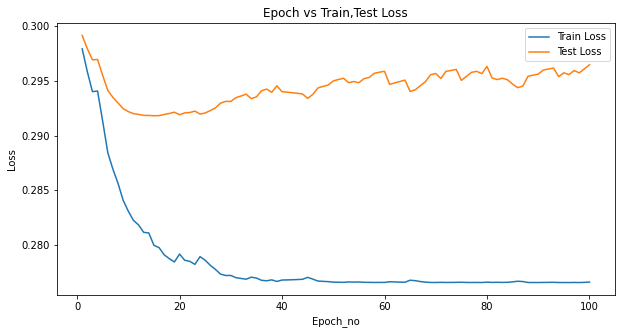

In [64]:
epochs = np.arange(1, epochs+1, 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Epoch vs Train,Test Loss')
plt.xlabel("Epoch_no")
plt.ylabel('Loss')
plt.legend()
print(100*'==')